In [1]:
from os import path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

sns.set()
plt.gcf().set_facecolor('white')

<Figure size 432x288 with 0 Axes>

In [2]:
filename = 'dataset.h5'
keyname = '20simpleHam_noise'
filepath = path.abspath(path.join(path.dirname("evaluation.py"), "..", "..", f"main/data/{filename}"))
# Load a single chunk => much faster
dataset = pd.read_hdf(filepath,keyname)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X,y= np.array(dataset["spectrum"].tolist()),np.array([dataset["aFieldStrength"].tolist(),dataset["b"].tolist(),dataset["c"].tolist()])
X_noise_1 = np.array(dataset["noise_spectrum_01"].tolist())
X_noise_3 = np.array(dataset["noise_spectrum_03"].tolist())
X_noise_5 = np.array(dataset["noise_spectrum_05"].tolist())
# only scale parameters not spectra
sc0,sc1,sc2 = StandardScaler().fit(y[0].reshape(-1,1)),StandardScaler().fit(y[1].reshape(-1,1)),StandardScaler().fit(y[2].reshape(-1,1))
# concatenate scaled parameters and split into training and test set
y = np.array([sc0.transform(y[0].reshape(-1,1)),sc1.transform(y[1].reshape(-1,1)),sc2.transform(y[2].reshape(-1,1))]).T.reshape(-1,3)
# Split in test and train_set, make sure to use same randomstate_ as before during training
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
_, X_test_n1, _, _ = train_test_split(X_noise_1,y, test_size=0.2, random_state=42)
_, X_test_n3, _, _ = train_test_split(X_noise_3,y, test_size=0.2, random_state=42)
_, X_test_n5, _, _ = train_test_split(X_noise_5,y, test_size=0.2, random_state=42)

In [10]:
# ################### EVALUATION OF MODEL ######################
# Load respective models
model = tf.keras.models.load_model('trained_models/cnn_mae_mape')
model.summary()
model_sn1 = tf.keras.models.load_model('trained_models/simple_mlp_sn1')
model_sn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1092, 8)           32        
                                                                 
 conv1d_1 (Conv1D)           (None, 364, 16)           400       
                                                                 
 conv1d_2 (Conv1D)           (None, 121, 32)           1568      
                                                                 
 conv1d_3 (Conv1D)           (None, 30, 64)            8256      
                                                                 
 conv1d_4 (Conv1D)           (None, 6, 128)            41088     
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 100)               7

63/63 [==============================] - 0s 5ms/step
0.91496369518018
63/63 [==============================] - 0s 3ms/step


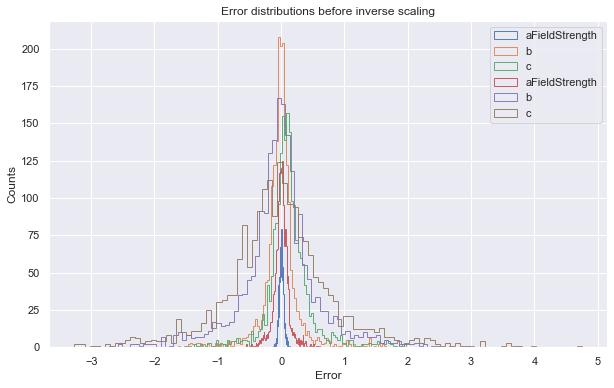

In [11]:
y_pred = model.predict(X_test)
absoluteerror = y_pred-y_test
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

plt.figure(figsize=(10,6), facecolor='white')
plt.hist(absoluteerror.T[0],bins=100,alpha = 0.9,label = 'aFieldStrength',histtype = 'step')
plt.hist(absoluteerror.T[1],bins=100,alpha = 0.9,label = 'b',histtype = 'step')
plt.hist(absoluteerror.T[2],bins=100,alpha = 0.9,label = 'c',histtype = 'step')

y_pred = model_sn1.predict(X_test_n1)
absoluteerror = y_pred-y_test

#plt.figure(figsize=(10,6), facecolor='white')
plt.hist(absoluteerror.T[0],bins=100,alpha = 0.9,label = 'aFieldStrength',histtype = 'step')
plt.hist(absoluteerror.T[1],bins=100,alpha = 0.9,label = 'b',histtype = 'step')
plt.hist(absoluteerror.T[2],bins=100,alpha = 0.9,label = 'c',histtype = 'step')


plt.title('Error distributions before inverse scaling')
plt.xlabel('Error')
plt.ylabel('Counts')
plt.legend()
plt.show()

63/63 [==============================] - 0s 2ms/step


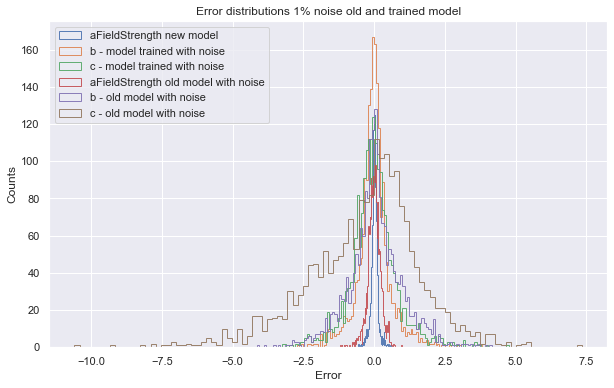

In [6]:
y_pred = model_sn1.predict(X_test_n1)
absoluteerror = y_pred-y_test

plt.figure(figsize=(10,6), facecolor='white')
plt.hist(absoluteerror.T[0],bins=100,alpha = 0.9,label = 'aFieldStrength new model',histtype = 'step')
plt.hist(absoluteerror.T[1],bins=100,alpha = 0.9,label = 'b - model trained with noise',histtype = 'step')
plt.hist(absoluteerror.T[2],bins=100,alpha = 0.9,label = 'c - model trained with noise',histtype = 'step')

y_pred = model.predict(X_test_n1)
absoluteerror = y_pred-y_test

#plt.figure(figsize=(10,6), facecolor='white')
plt.hist(absoluteerror.T[0],bins=100,alpha = 0.9,label = 'aFieldStrength old model with noise',histtype = 'step')
plt.hist(absoluteerror.T[1],bins=100,alpha = 0.9,label = 'b - old model with noise',histtype = 'step')
plt.hist(absoluteerror.T[2],bins=100,alpha = 0.9,label = 'c - old model with noise',histtype = 'step')
plt.title('Error distributions 1% noise old and trained model')
plt.xlabel('Error')
plt.ylabel('Counts')
plt.legend()
plt.show()

63/63 [==============================] - 0s 2ms/step


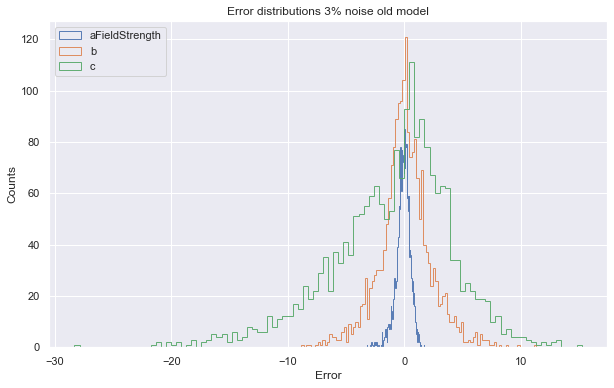

In [7]:
plt.show()
y_pred = model.predict(X_test_n3)
absoluteerror = y_pred - y_test

plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(absoluteerror.T[0], bins=100, alpha=0.9, label='aFieldStrength', histtype='step')
plt.hist(absoluteerror.T[1], bins=100, alpha=0.9, label='b', histtype='step')
plt.hist(absoluteerror.T[2], bins=100, alpha=0.9, label='c', histtype='step')
plt.title('Error distributions 3% noise old model')
plt.xlabel('Error')
plt.ylabel('Counts')
plt.legend()
plt.show()

63/63 [==============================] - 0s 2ms/step


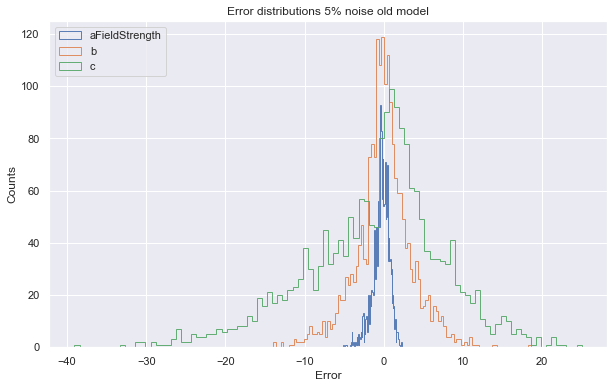

In [8]:
plt.show()
y_pred = model.predict(X_test_n5)
absoluteerror = y_pred - y_test

plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(absoluteerror.T[0], bins=100, alpha=0.9, label='aFieldStrength', histtype='step')
plt.hist(absoluteerror.T[1], bins=100, alpha=0.9, label='b', histtype='step')
plt.hist(absoluteerror.T[2], bins=100, alpha=0.9, label='c', histtype='step')
plt.title('Error distributions 5% noise old model')
plt.xlabel('Error')
plt.ylabel('Counts')
plt.legend()
plt.show()